In [111]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('marketing_customer_analysis.csv')

df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=object)


display(df_cat)

# X-y split

y_num = df_num['Total Claim Amount']
X_num = df_num.drop(['Total Claim Amount'], axis=1)

#X.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [114]:
# Normalize 

from sklearn.preprocessing import MinMaxScaler 

MinMaxtransformer = MinMaxScaler()

MinMaxtransformer.fit(df_num) 

x_normalized = MinMaxtransformer.transform(df_num) 

x_normalized = round(pd.DataFrame(x_normalized,columns=df_num.columns),4)

x_normalized.head(10)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0106,0.5628,0.0338,0.9143,0.0505,0.0,0.000,0.1330
1,0.0624,0.0000,0.1392,0.3714,0.4242,0.0,0.875,0.3911
2,0.1350,0.4878,0.1983,0.5143,0.3838,0.0,0.125,0.1958
3,0.0706,0.0000,0.1899,0.5143,0.6566,0.0,0.750,0.1831
4,0.0112,0.4384,0.0506,0.3429,0.4444,0.0,0.000,0.0477
5,0.0781,0.6291,0.0338,0.4000,0.9495,0.0,0.125,0.0551
6,0.0428,0.5536,0.0253,0.0000,0.1313,0.0,1.000,0.1111
7,0.0653,0.0000,0.1688,0.0000,0.6869,0.0,0.375,0.1254
8,0.2730,0.1407,0.0422,0.3714,0.0303,0.0,0.125,0.1767
9,0.0674,0.2882,0.1350,0.4857,0.0707,0.0,0.875,0.1470


In [108]:
# One hot Encoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoder.fit(df_cat)

encoded = encoder.transform(df_cat).toarray()

encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out())

encoded.head()


,Customer_AA10041,Customer_AA11235,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [95]:
# Concat DFs

X_new = pd.concat([X_num, x_normalized], axis = 1)

X_new.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,2763.519279,56274,69,32,5,0,1,0.0106,0.5628,0.0338,0.9143,0.0505,0.0,0.000
1,6979.535903,0,94,13,42,0,8,0.0624,0.0000,0.1392,0.3714,0.4242,0.0,0.875
2,12887.431650,48767,108,18,38,0,2,0.1350,0.4878,0.1983,0.5143,0.3838,0.0,0.125
3,7645.861827,0,106,18,65,0,7,0.0706,0.0000,0.1899,0.5143,0.6566,0.0,0.750
4,2813.692575,43836,73,12,44,0,1,0.0112,0.4384,0.0506,0.3429,0.4444,0.0,0.000


TypeError: type AxesSubplot doesn't define __round__ method

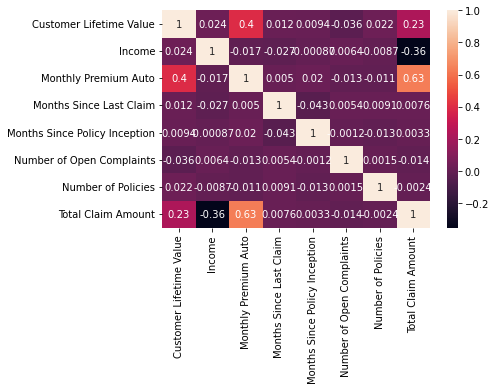

In [116]:
correlations_matrix = x_normalized.corr()
sns.heatmap(correlations_matrix, annot=True)


In [118]:
X = x_normalized[['Monthly Premium Auto', 'Income', 'Customer Lifetime Value']]
y = x_normalized['Total Claim Amount']

In [119]:
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_normalized = minMaxScaler.transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

In [122]:
X.describe()

,Monthly Premium Auto,Income,Customer Lifetime Value
count,9134.000000,9134.000000,9134.000000
mean,0.135947,0.376645,0.074998
std,0.145182,0.303857,0.084382
min,0.000000,0.000000,0.000000
25%,0.029500,0.000000,0.025725
50%,0.092800,0.338950,0.047700
75%,0.202500,0.623325,0.086775
max,1.000000,1.000000,1.000000


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def train_and_validate_model(X, y, test_size=0.2, random_state=42):
    
    # Split X,y into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=test_size,
                                                        random_state=random_state)
    print(f'X_train: {X_train.shape}')
    print(f'X_test:  {X_test.shape}')
    print(f'y_train: {y_train.shape}')
    print(f'y_test:  {y_test.shape}')


    # Apply linear regression, train/fit the model
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    
    # Predict training set
    y_pred_train = lm.predict(X_train)
    print(f"y_pred_train = {y_pred_train}")

    # R2 score for training set
    r2_train = r2_score(y_train, y_pred_train)
    print(f"r2_train     = {r2_train}")

    # Predict test set
    y_pred_test  = lm.predict(X_test)
    print(f"y_pred_test = {y_pred_test}")

    # R2 score for test set
    r2_test = r2_score(y_test, y_pred_test)
    print(f"r2_test     = {r2_test}")

    # MSE - Mean Squared Error
    mse = mean_squared_error(y_test,y_pred_test)
    print(f'MSE = {mse}')

    # RMSE - Root Mean Squared Error
    rmse = np.sqrt(mse)
    print(f'RMSE = {rmse}')

    # MAE - Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred_test)
    print(f'MAE = {mae}')
    
    return y_pred_test, y_pred_train, y_train, y_test, lm

In [125]:
y_pred_test, y_pred_train, y_train, y_test, model = train_and_validate_model(X, y, 0.3, 25)

X_train: (6393, 3)
X_test:  (2741, 3)
y_train: (6393,)
y_test:  (2741,)
y_pred_train = [0.09493111 0.18810193 0.15138897 ... 0.0570595  0.14185473 0.14402902]
r2_train     = 0.5482847958319703
y_pred_test = [0.18814347 0.13804307 0.08408734 ... 0.11016284 0.29694045 0.14507345]
r2_test     = 0.4296293793349605
MSE = 0.0049972029177704925
RMSE = 0.07069089699367587
MAE = 0.050930669436399637
